
Tarea práctica 6 - Análisis Numérico

Edison Santiago Tutalcha Bastidas

Código: 1927038-3147

### Ejercicio 1

- Implemente las matrices de diferenciación de la primera y segunda derivada usando la formulas de diferencias finitas centradas de orden 2. Para los bordes utilize las formulas de diferencias finitas adelantadas y atrazadas segun corresponda. 

- Ponga a prueba sus matrices de diferenciación para la función

 $$f(x) = \sin(x)+ \cos(x)$$
 

- Compruebe numericamente que el error de truncamiento para estas matrices es de $\mathcal{O}(h^2)$

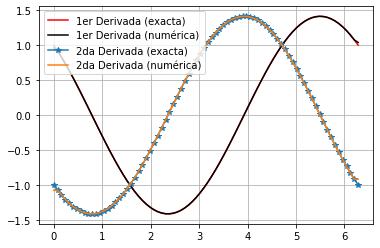

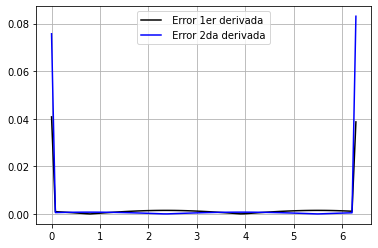

In [20]:
import numpy as np
import matplotlib.pyplot as plt


n = 80                       # Cantidad de nodos a usar
x = np.linspace(0, 2*np.pi, n)     # Definimos el dominio a 
h = x[1]-x[0]


# Definimos la función exacta
f = np.sin(x) + np.cos(x) 

# Definimos la derivada de la función exacta
dfdx_ex  =  np.cos(x) - np.sin(x)  
df2dx_ex = -np.sin(x) - np.cos(x)




# Creamos al matriz de diferenciación para la primer derivada

# Diagonal principal
Diagonal_principal =  -1 * np.diag(np.ones(len(x)-1), k=-1)

# Diagonal superior (diagonal sobre la principal)
Diagonal_superior =  1 * np.diag(np.ones(len(x)-1), k=1)

m_dif = (Diagonal_principal + Diagonal_superior)/(2*h)


# A continuación vamos a realizar las correcciones respectivas para los valores 
# de frontera (Usando teoricamente diferencias adelantadas y atrasadas)

# Corregimos los dos primeros valores de la primera fila (frontera lateral izquierda)

m_dif[0,1] = 1/h 
m_dif[0,0] =-1/h 

# Corregimos los dos últimos valores de la última fila (frontera lateral derecha)

m_dif[-1,-1] = 1/h 
m_dif[-1,-2] =-1/h 





# Creamos al matriz de diferenciación para la segunda derivada

# Diagonal principal
Diagonal_principal2 =  -2 * np.diag(np.ones(len(x))) 

# Diagonal ubicada debajo de la diagonal principal
Diagonal_inferior2 =  1 * np.diag(np.ones(len(x)-1), k=-1)

# Diagonal ubicada sobre la diagonal principal
Diagonal_superior2 =  1 * np.diag(np.ones(len(x)-1), k=1)

m_dif2 = (Diagonal_inferior2 + Diagonal_principal2 + Diagonal_superior2)/(h**2) 


# A continuación vamos a realizar las correcciones respectivas para los valores 
# de frontera (Usando teoricamente diferencias adelantadas y atrasadas)

# Corregimos los tres últimos valores de la última fila

m_dif2[-1,-3] = 1/(h**2)
m_dif2[-1,-2] =-2/(h**2) 
m_dif2[-1,-1] = 1/(h**2) 

# # Corregimos los tres primeros valores de la primera fila

m_dif2[0,0] = 1/(h**2)
m_dif2[0,1] =-2/(h**2) 
m_dif2[0,2] = 1/(h**2) 





# Derivamos la función haciendo uso respectivo de nuestras matrices de diferenciación

Df  = m_dif  @ f
Df2 = m_dif2 @ f

# Definimos los parámetros para las gráficas

# Grafico Numérica vs Exacta de la primer derivada
plt.plot( x , dfdx_ex  , '-r', label='1er Derivada (exacta)')
plt.plot( x , Df, '-0', label='1er Derivada (numérica)')


# Grafico Numérica vs Exacta de la segunda derivada
plt.plot( x , df2dx_ex  , '-*', label ='2da Derivada (exacta)')
plt.plot( x , Df2, '-', label ='2da Derivada (numérica)')


plt.legend()
plt.grid() 
plt.show()


# Definimos nuestros errores de truncamiento

Error_1 = abs( dfdx_ex  - Df )                        
Error_2 = abs( df2dx_ex - Df2)                      

# Definimos la gráfica para los errores

plt.plot(x, Error_1, '-0', label=' Error 1er derivada' )          
plt.plot(x, Error_2, '-b', label=' Error 2da derivada' )

plt.legend()
plt.grid()
plt.show() 

print(" Graficamente se puede observar que el error en cada derivada es mayor en los extremos")
print(" Note que la solución numérica resulta una buena proximación de la solución exacta")

In [17]:
# Ahora comprobaremos nuestros errores de truncamiento según el tamaño de paso


Er_truncamiento = np.max(np.abs(dfdx_ex - Df)) 
print( "El error de truncamiento de la primer derivada con el tamaño de paso ", h ,"es ", Er_truncamiento)

Er_truncamiento2 = np.max(np.abs(df2dx_ex - Df2)) 
print( "El error de truncamiento de la segunda derivada con el tamaño de paso ", h , "es ", Er_truncamiento2)

print(" ")
print("Note que numericamente llegamos a que el error para ambas derivadas es del orden de h^{2}")

El error de truncamiento de la primer derivada con el tamaño de paso  0.06283185307179587 es  0.040799979901953165
El error de truncamiento de la segunda derivada con el tamaño de paso  0.06283185307179587 es  0.08309481641236949
 
Note que numericamente llegamos a que el error para ambas derivadas es del orden de h^{2}


### Ejercicio 2

- Implemente numericamente el algoritmo de integración compuesta de Simpson  y verifique numericamente que 

$$\int^{2 \pi}_{0} \sin (x) dx  = 0$$

**Sugerencia:** Siga el algoritmo 5.13 de la pagina 260 que se encuentra en el libro de guia del curso (*Análisis númerico* de Ignacio Mantilla) 

In [19]:
import numpy as np                      
import matplotlib.pyplot as plt


n = 50                           # Definimos la mitad de la cantidad de nodos a usar
x = np.linspace(0, 2*np.pi, 2*n)       # Intervalo de integración 
h = (x[-1]-x[0])/(2*n)                       # Calculamos h en función de la cantidad de nodos

# Definimos la función sen(x)   

def f(x):                                                    
  return np.sin(x) 

# Valores iniciales e inicialización de sumatorias

s_0 = f(0) + f(2*np.pi)     # Definimos el valor que va a toma s_0 segun la formula de Simpson (Mantilla)

s_1 = 0     # Inicializamos el valor de la sumatoria s_1
s_2 = 0     # Inicializamos el valor de la sumatoria s_2

# Creamos el ciclo que va a recorrer el doble de nodos menos 1 elementos

for i in range(2*n-1):                        
  x = 0 + (i+1)*h              # Establecemos el dominio para f que va a estar en el ciclo.

# Note que lo que en el libro se tiene como i (como contador)
# para programar usamos i+1

  if (i+1) % 2 == 0:    # Si i es par 
    s_2 = s_2 + f(x)        # Definimos la suma de Simpson

  else:                 # Si i es impar
    s_1 = s_1 + f(x)        # Definimos la suma de Simpson


# Definimos el producto del método de Simpson compuesto (Mantilla)

sol_int = (h/3)*(s_0+(4*s_1)+(2*s_2))      
print(sol_int)

print(" ")
print("Note que la solución numérica es un valor cercano a 0, lo que es de esperarse teoricamente")

-2.7219622337312777e-17
 
Note que la solución numérica es un valor cercano a 0, lo que es de esperarse teoricamente
